## OBJECTIVE

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.




## Domain Analysis

1. In the given dataset we have the following columns: battery_power, bluetooth, clock_speed, dual_sim,            front_camera, four_g, int_memory, mobile_depth, mobile_weight, n_cores, primary_camera, pixel_height,          pixel_width, ram, screen_height, screen_width, talk_time, three_g, touch_screen, wifi,price_range.
   - Battery_power denotes the battery capacity of the device.
   - The presence of Bluetooth connectivity is indicated by the Bluetooth column.
   - Clock_speed represents the processor's execution speed for inputs.
   - Dual_sim signifies whether the device supports dual SIM cards.
   - Front_camera provides the megapixel count for the front-facing camera.
   - Four_g indicates whether the device supports 4G network connectivity.
   - Int_memory denotes the device's internal memory capacity in gigabytes.
   - Mobile_depth measures the depth dimension of the device.
   - Mobile_weight represents the total weight of the device in grams.
   - N_cores indicates the number of processor cores the device possesses.
   - Primary_camera signifies the megapixel count for the primary (rear) camera.
   - Pixel_height refers to the pixel resolution height of the device.
   - Pixel_width refers to the pixel resolution width of the device.
   - RAM represents the amount of memory in megabytes the device possesses.
   - Screen_height denotes the height of the device's screen.
   - Screen_width represents the width of the device's screen.
   - Talk_time indicates the total screen-on time the device can remain functional.
   - Three_g denotes the 3G network capability of the device.
   - Touch_screen indicates whether the device has touch capabilities.
   - Price_range, our target variable, classifies devices into Low, Medium, High, or Very High Cost categories.
   
   #
2. Today's mobile phone market is highly segmented and fiercely competitive, nearing saturation. Saturation significantly impacts prices, as very high-cost phones often lack substantial innovation, while flagship killer variants fiercely challenge top-tier phones in specifications. Further down the spectrum, competition intensifies, with numerous companies offering various models at similar price points. This creates a challenging environment for both consumers and companies, as models within the same price segment often feature similar attributes, including build quality and materials used.
##

3. In such a market, it becomes crucial for new entrants to carefully select a market segment for their devices and tailor them with appropriate features accordingly.
##
4. Additionally, for a newcomer to make a notable impact in the market and garner a share of the market, they must offer something unique that existing models do not provide.
   
   

### 1. Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Importing the Data

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data=pd.read_csv("cellphone.csv")

In [4]:
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
1       0.7        136        3   6        905      1988  2631    17     3   
2       0.9        145        5   6       1263      1716  2603    11     2   
3       0.8        131        6   9       1216      1786  2769    16     8   
4       0.6        141        2  14       1208      1212  1411     8     2   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [5]:
data.rename(columns={'blue':'bluetooth','fc':'front_camera','m_dep':'mobile_depth','mobile_wt':'mobile_weight','pc':'primary_camera','px_height':'pixel_height','px_width':'pixel_width','sc_h':'screen_height','sc_w':'screen_width'},inplace=True)

In [6]:
data

battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0               842          0          2.2         0             1       0   
1              1021          1          0.5         1             0       1   
2               563          1          0.5         1             2       1   
3               615          1          2.5         0             0       0   
4              1821          1          1.2         0            13       1   
...             ...        ...          ...       ...           ...     ...   
1995            794          1          0.5         1             0       1   
1996           1965          1          2.6         1             0       0   
1997           1911          0          0.9         1             1       1   
1998           1512          0          0.9         0             4       1   
1999            510          1          2.0         1             5       1   

      int_memory  mobile_depth  mobile_weight  n_cores  primary_camera  \
0              7           0.6            188        2               2   
1             53           0.7            136        3               6   
2             41           0.9            145        5               6   
3             10           0.8            131        6               9   
4             44           0.6            141        2              14   
...          ...           ...            ...      ...             ...   
1995           2           0.8            106        6              14   
1996          39           0.2            187        4               3   
1997          36           0.7            108        8               3   
1998          46           0.1            145        5               5   
1999          45           0.9            168        6              16   

      pixel_height  pixel_width   ram  screen_height  screen_width  talk_time  \
0               20          756  2549              9             7         19   
1              905         1988  2631             17             3          7   
2             1263         1716  2603             11             2          9   
3             1216         1786  2769             16             8         11   
4             1208         1212  1411              8             2         15   
...            ...          ...   ...            ...           ...        ...   
1995          1222         1890   668             13             4         19   
1996           915         1965  2032             11            10         16   
1997           868         1632  3057              9             1          5   
1998           336          670   869             18            10         19   
1999           483          754  3919             19             4          2   

      three_g  touch_screen  wifi  price_range  
0           0             0     1            1  
1           1             1     0            2  
2           1             1     0            2  
3           1             0     0            2  
4           1             1     0            1  
...       ...           ...   ...          ...  
1995        1             1     0            0  
1996        1             1     1            2  
1997        1             1     0            3  
1998        1             1     1            0  
1999        1             1     1            3  

[2000 rows x 21 columns]

### 3. Finding the Null values 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_camera    2000 non-null   int64  
 5   four_g          2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   mobile_depth    2000 non-null   float64
 8   mobile_weight   2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  pixel_height    2000 non-null   int64  
 12  pixel_width     2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  screen_height   2000 non-null   int64  
 15  screen_width    2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

### 4. General info about the Data

In [8]:
data.head()

battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0            842          0          2.2         0             1       0   
1           1021          1          0.5         1             0       1   
2            563          1          0.5         1             2       1   
3            615          1          2.5         0             0       0   
4           1821          1          1.2         0            13       1   

   int_memory  mobile_depth  mobile_weight  n_cores  primary_camera  \
0           7           0.6            188        2               2   
1          53           0.7            136        3               6   
2          41           0.9            145        5               6   
3          10           0.8            131        6               9   
4          44           0.6            141        2              14   

   pixel_height  pixel_width   ram  screen_height  screen_width  talk_time  \
0            20          756  2549              9             7         19   
1           905         1988  2631             17             3          7   
2          1263         1716  2603             11             2          9   
3          1216         1786  2769             16             8         11   
4          1208         1212  1411              8             2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [9]:
data.tail()

battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
1995            794          1          0.5         1             0       1   
1996           1965          1          2.6         1             0       0   
1997           1911          0          0.9         1             1       1   
1998           1512          0          0.9         0             4       1   
1999            510          1          2.0         1             5       1   

      int_memory  mobile_depth  mobile_weight  n_cores  primary_camera  \
1995           2           0.8            106        6              14   
1996          39           0.2            187        4               3   
1997          36           0.7            108        8               3   
1998          46           0.1            145        5               5   
1999          45           0.9            168        6              16   

      pixel_height  pixel_width   ram  screen_height  screen_width  talk_time  \
1995          1222         1890   668             13             4         19   
1996           915         1965  2032             11            10         16   
1997           868         1632  3057              9             1          5   
1998           336          670   869             18            10         19   
1999           483          754  3919             19             4          2   

      three_g  touch_screen  wifi  price_range  
1995        1             1     0            0  
1996        1             1     1            2  
1997        1             1     0            3  
1998        1             1     1            0  
1999        1             1     1            3

In [10]:
data.describe()

battery_power  bluetooth  clock_speed     dual_sim  front_camera  \
count    2000.000000  2000.0000  2000.000000  2000.000000   2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500      4.309500   
std       439.418206     0.5001     0.816004     0.500035      4.341444   
min       501.000000     0.0000     0.500000     0.000000      0.000000   
25%       851.750000     0.0000     0.700000     0.000000      1.000000   
50%      1226.000000     0.0000     1.500000     1.000000      3.000000   
75%      1615.250000     1.0000     2.200000     1.000000      7.000000   
max      1998.000000     1.0000     3.000000     1.000000     19.000000   

            four_g   int_memory  mobile_depth  mobile_weight      n_cores  \
count  2000.000000  2000.000000   2000.000000    2000.000000  2000.000000   
mean      0.521500    32.046500      0.501750     140.249000     4.520500   
std       0.499662    18.145715      0.288416      35.399655     2.287837   
min       0.000000     2.000000      0.100000      80.000000     1.000000   
25%       0.000000    16.000000      0.200000     109.000000     3.000000   
50%       1.000000    32.000000      0.500000     141.000000     4.000000   
75%       1.000000    48.000000      0.800000     170.000000     7.000000   
max       1.000000    64.000000      1.000000     200.000000     8.000000   

       primary_camera  pixel_height  pixel_width          ram  screen_height  \
count     2000.000000   2000.000000  2000.000000  2000.000000    2000.000000   
mean         9.916500    645.108000  1251.515500  2124.213000      12.306500   
std          6.064315    443.780811   432.199447  1084.732044       4.213245   
min          0.000000      0.000000   500.000000   256.000000       5.000000   
25%          5.000000    282.750000   874.750000  1207.500000       9.000000   
50%         10.000000    564.000000  1247.000000  2146.500000      12.000000   
75%         15.000000    947.250000  1633.000000  3064.500000      16.000000   
max         20.000000   1960.000000  1998.000000  3998.000000      19.000000   

       screen_width    talk_time      three_g  touch_screen         wifi  \
count   2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean       5.767000    11.011000     0.761500      0.503000     0.507000   
std        4.356398     5.463955     0.426273      0.500116     0.500076   
min        0.000000     2.000000     0.000000      0.000000     0.000000   
25%        2.000000     6.000000     1.000000      0.000000     0.000000   
50%        5.000000    11.000000     1.000000      1.000000     1.000000   
75%        9.000000    16.000000     1.000000      1.000000     1.000000   
max       18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

###  5. Exploratory Data Analysis 

#### A. Univariant Analysis 

In [11]:
import sweetviz as sv # library for univariant analysis
my_report=sv.analyze(data) # passing the original dataframe
my_report.show_html() # arguments will generate to the library 

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


1.  The market's average phone battery size stands at 1239 mAh, with a range from 501 mAh to 1998 mAh.
2.  Bluetooth connectivity is present in 50% of market phones, while the remainder lack this feature.
3.  Devices in the market exhibit an average clock speed of 1.52 GHz, with a range from 0.5 GHz to 3 GHz.
4.  Dual SIM slots are included in 51% of phones, with the rest lacking this feature.
5.  The average megapixel count for front cameras is 4.3 megapixels, ranging from 0 to 19 megapixels, with some     devices not equipped with a front camera.
6.  52% of phones in the market support 4G.
7.  Market devices have an average internal memory of 32GB, with a range from 2GB to 64GB.
8.  The average thickness of market phones is 0.5cm, ranging from 0.1cm to 1cm.
9.  The average weight of phones in the market is 140 grams, with weights ranging from 80 grams to 200 grams.
10. The average number of cores in mobile phones is 4.5, with a range from 1 to 8 cores.
11. The average megapixel count for primary cameras is 9.9 megapixels, with a range from 0 to 20 megapixels,       indicating some devices lack a primary camera.
12. Camera pixel heights in phones average at 645, ranging from 0 to 1960.
13. Camera pixel widths in phones average at 1252, ranging from 500 to 1998.
14. The average RAM of devices is 2124 Mb, ranging from 256 Mb to 3998 Mb.
15. The mean screen height of devices is 12.3 cm, with heights ranging from 5cm to 19cm.
16. The mean screen height of devices is 12.3 cm, with heights ranging from 5cm to 19cm.
17. The average battery life of phones is approximately 11 hours, with a range from 2 hours to 20 hours.
18. Touchscreen functionality is present in 50% of market devices.
19. Wifi functionality is present in 51% of market devices.
20. Market segmentation across Low, Medium, High, and Very High cost categories is evenly distributed at 25%       each.

#### B. Bivariant Analysis

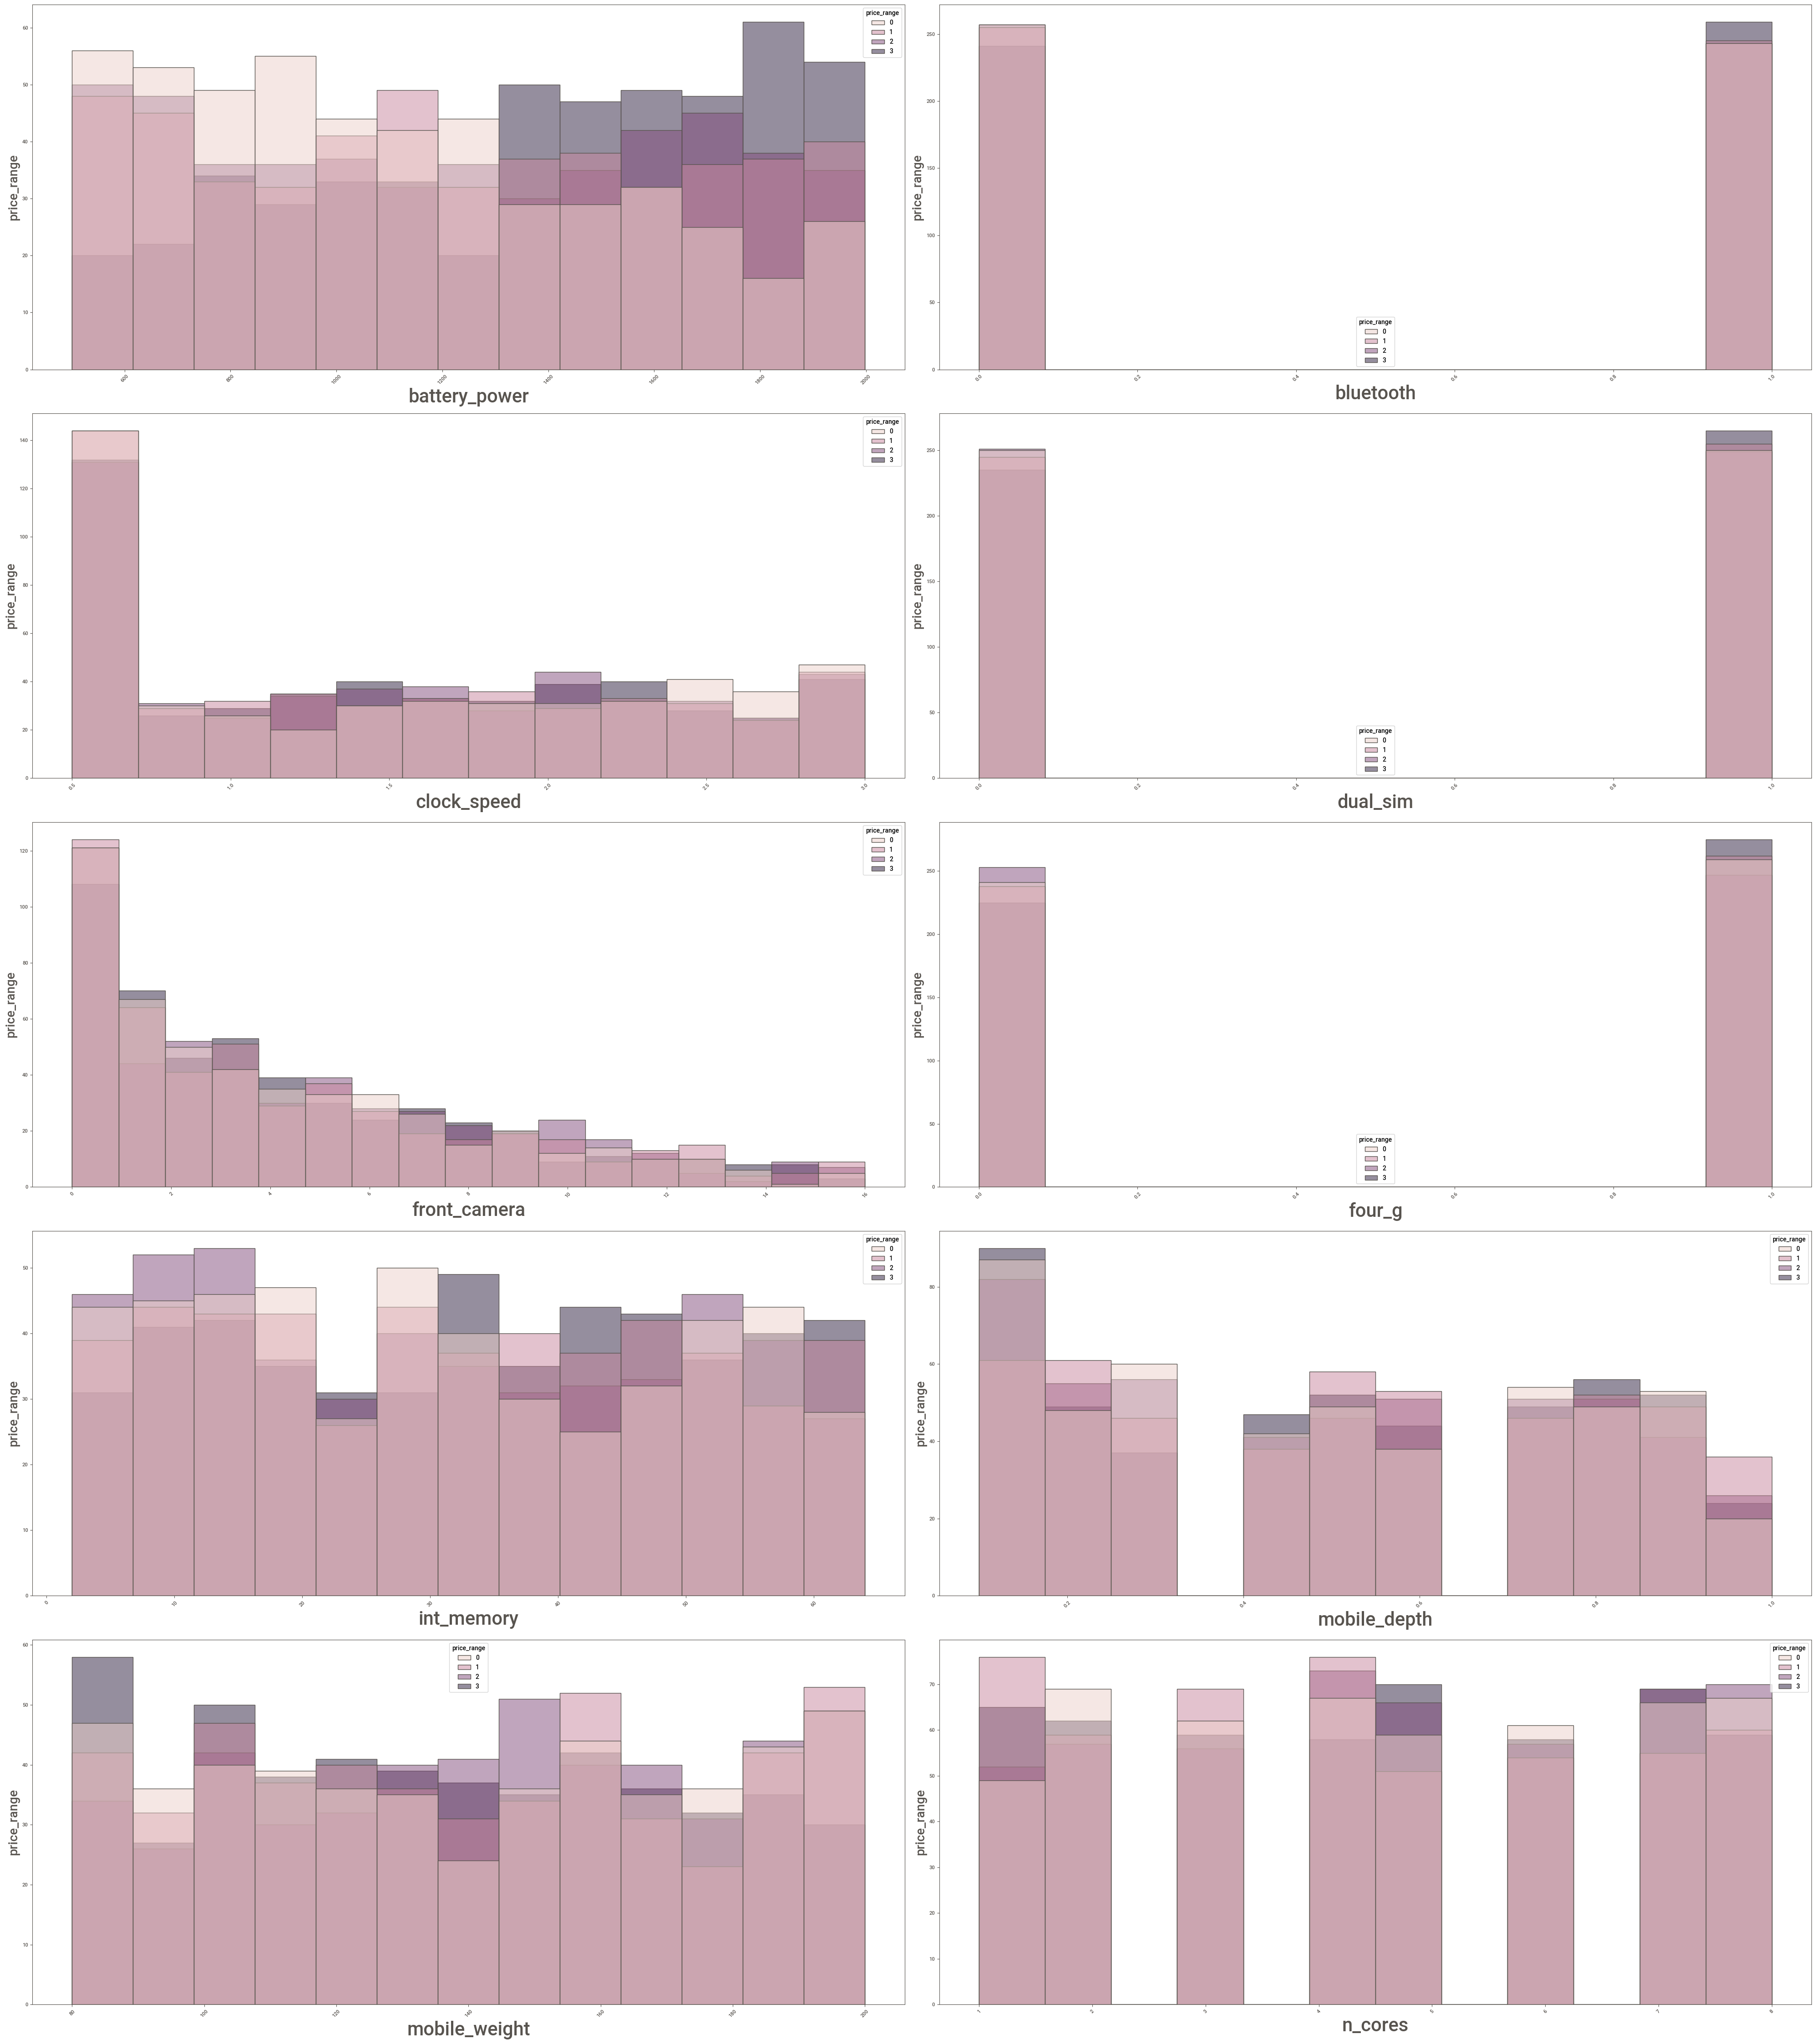

In [51]:
plt.figure(figsize=(40,45), facecolor='white')

plotnumber = 1

for column in data:
    if plotnumber <= 10:
        plt.subplot(5, 2, plotnumber)
        sns.histplot(x=data[column], hue=data['price_range'])
        plt.xlabel(column, fontsize=30)  # Decreased the fontsize for better visualization
        plt.ylabel("price_range", fontsize=20, rotation=90)
        plt.xticks(rotation=45)
    plotnumber += 1

plt.tight_layout()

#### C. Multi Variant Analysis

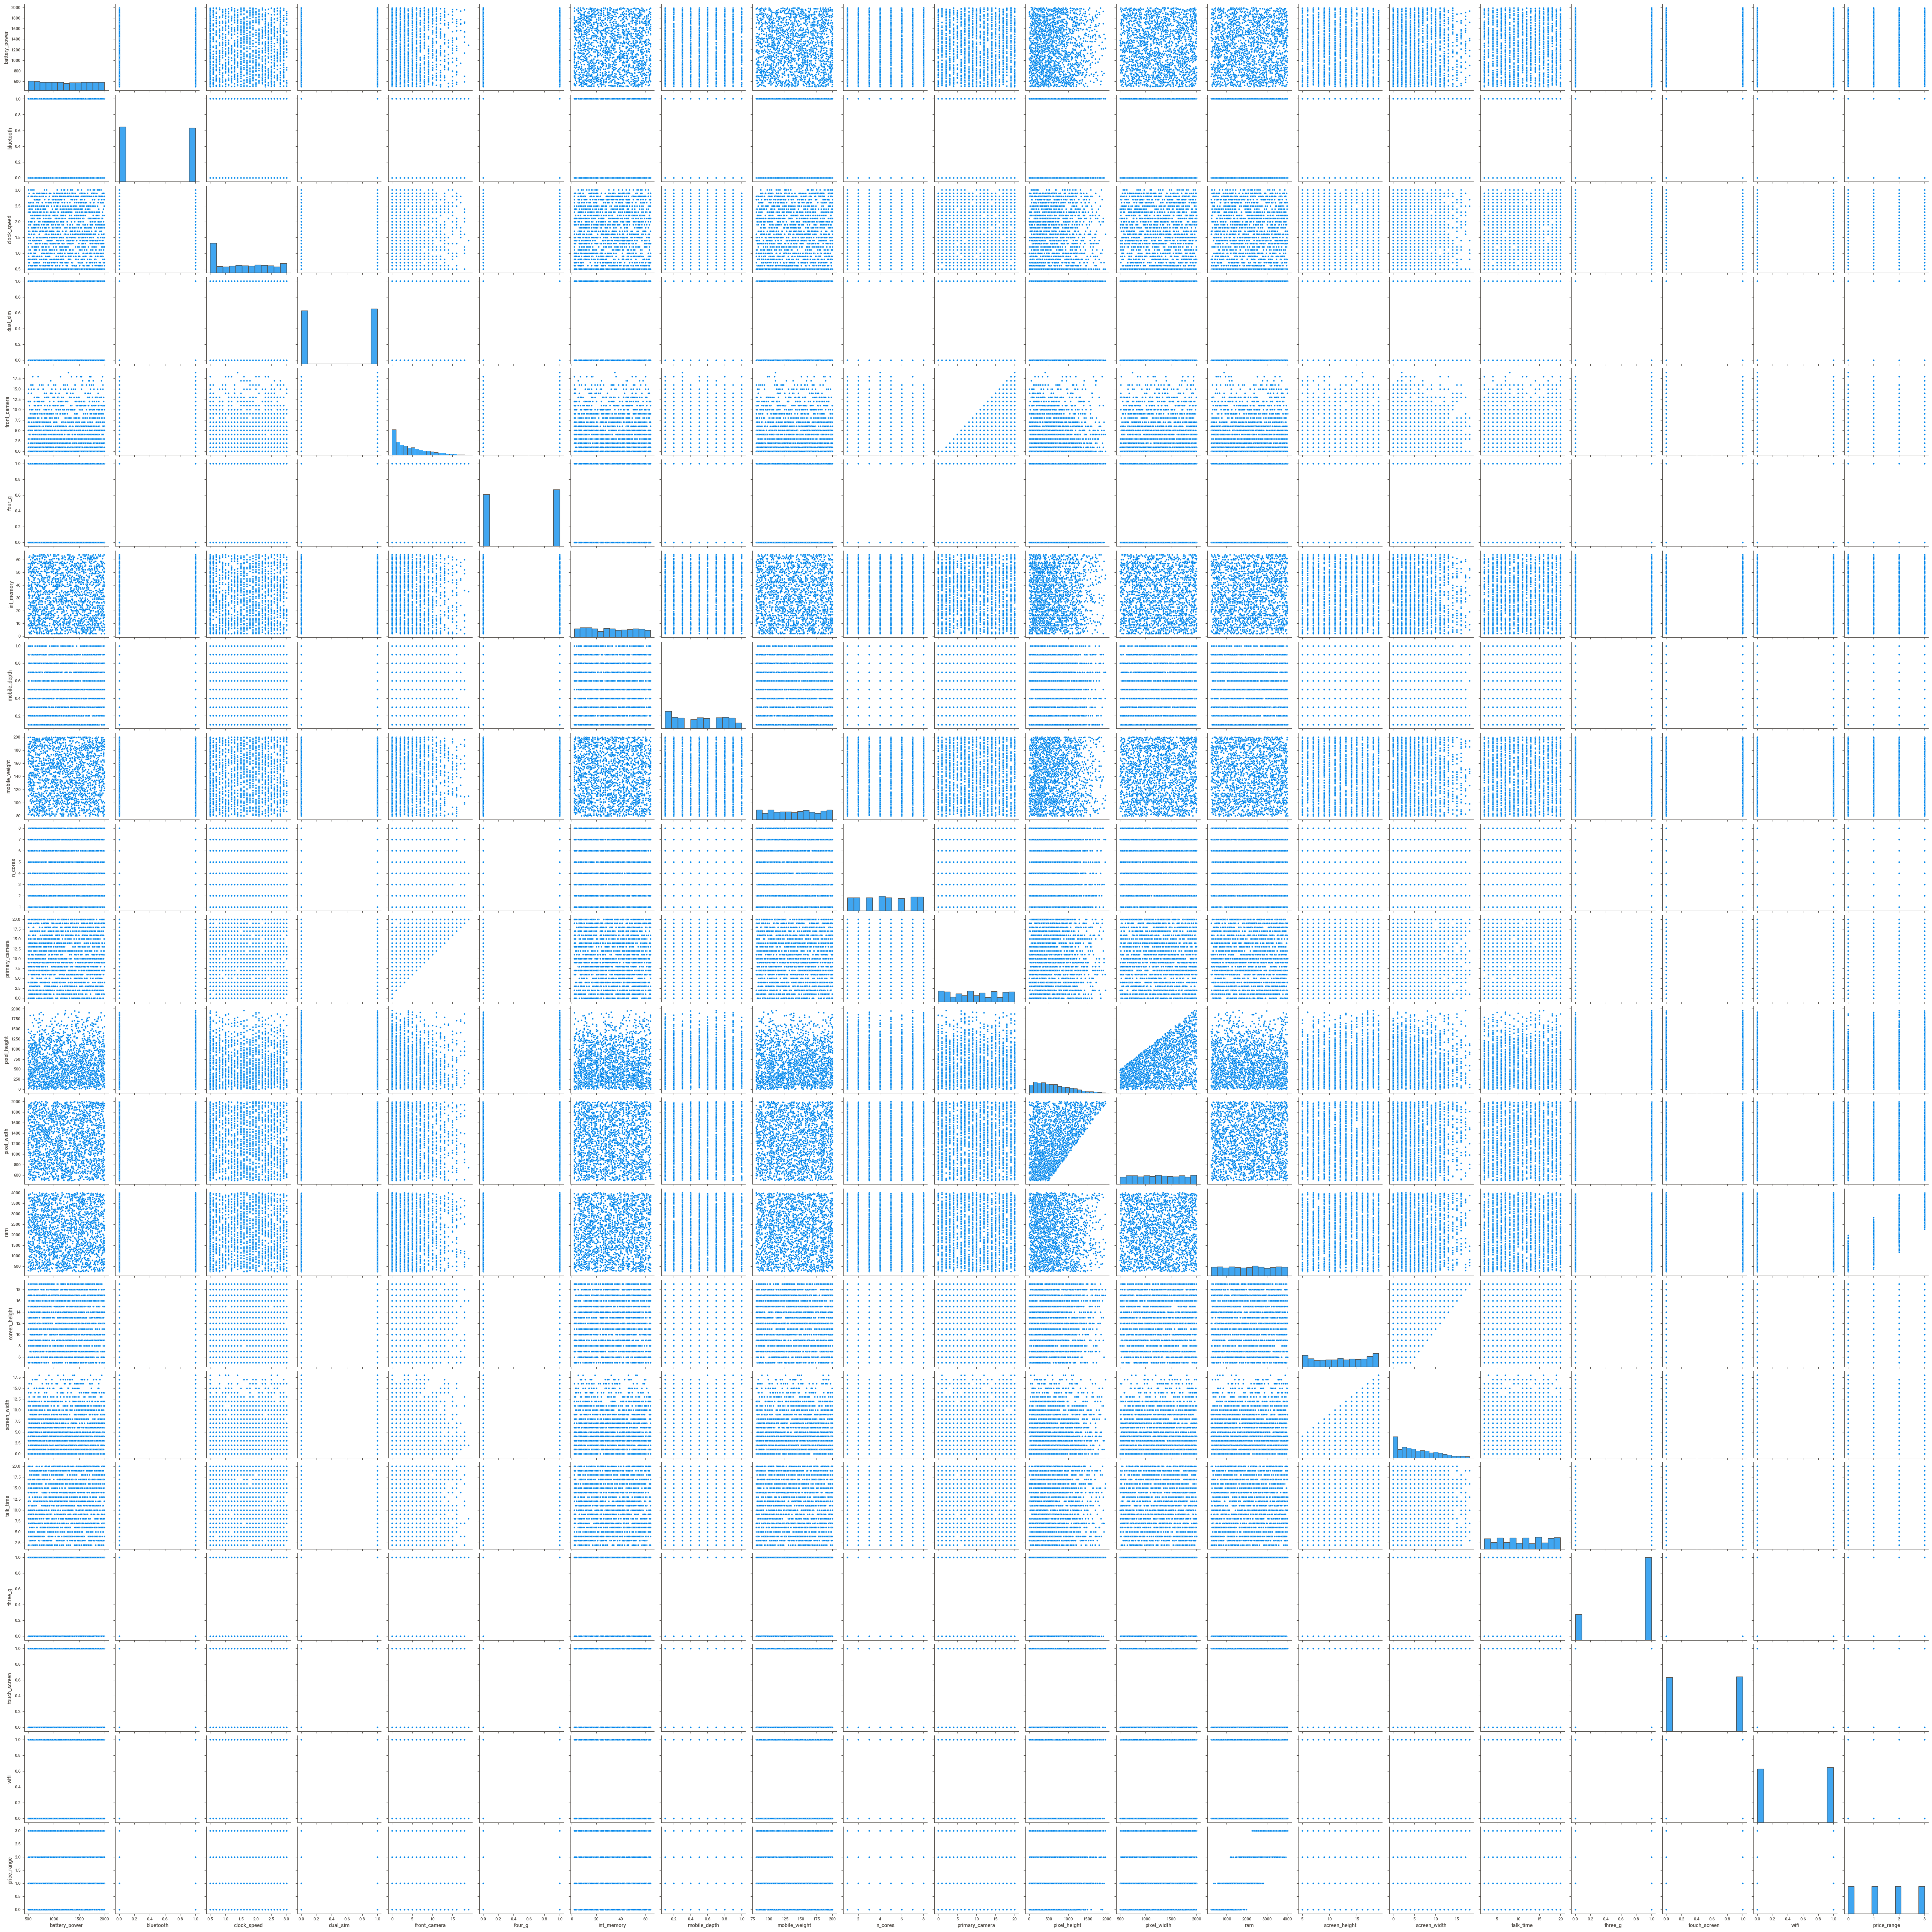

In [13]:
sns.pairplot(data)

### 6. Data Preprocessing and Feature Engineering

In [14]:
data.isnull().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_camera      0
four_g            0
int_memory        0
mobile_depth      0
mobile_weight     0
n_cores           0
primary_camera    0
pixel_height      0
pixel_width       0
ram               0
screen_height     0
screen_width      0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [35]:
# There are no null values in the dataset 

In [17]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       'four_g', 'int_memory', 'mobile_depth', 'mobile_weight', 'n_cores',
       'primary_camera', 'pixel_height', 'pixel_width', 'ram', 'screen_height',
       'screen_width', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

In [18]:
corr_data=data[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       'four_g', 'int_memory', 'mobile_depth', 'mobile_weight', 'n_cores',
       'primary_camera', 'pixel_height', 'pixel_width', 'ram', 'screen_height',
       'screen_width', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range']]

<Axes: >

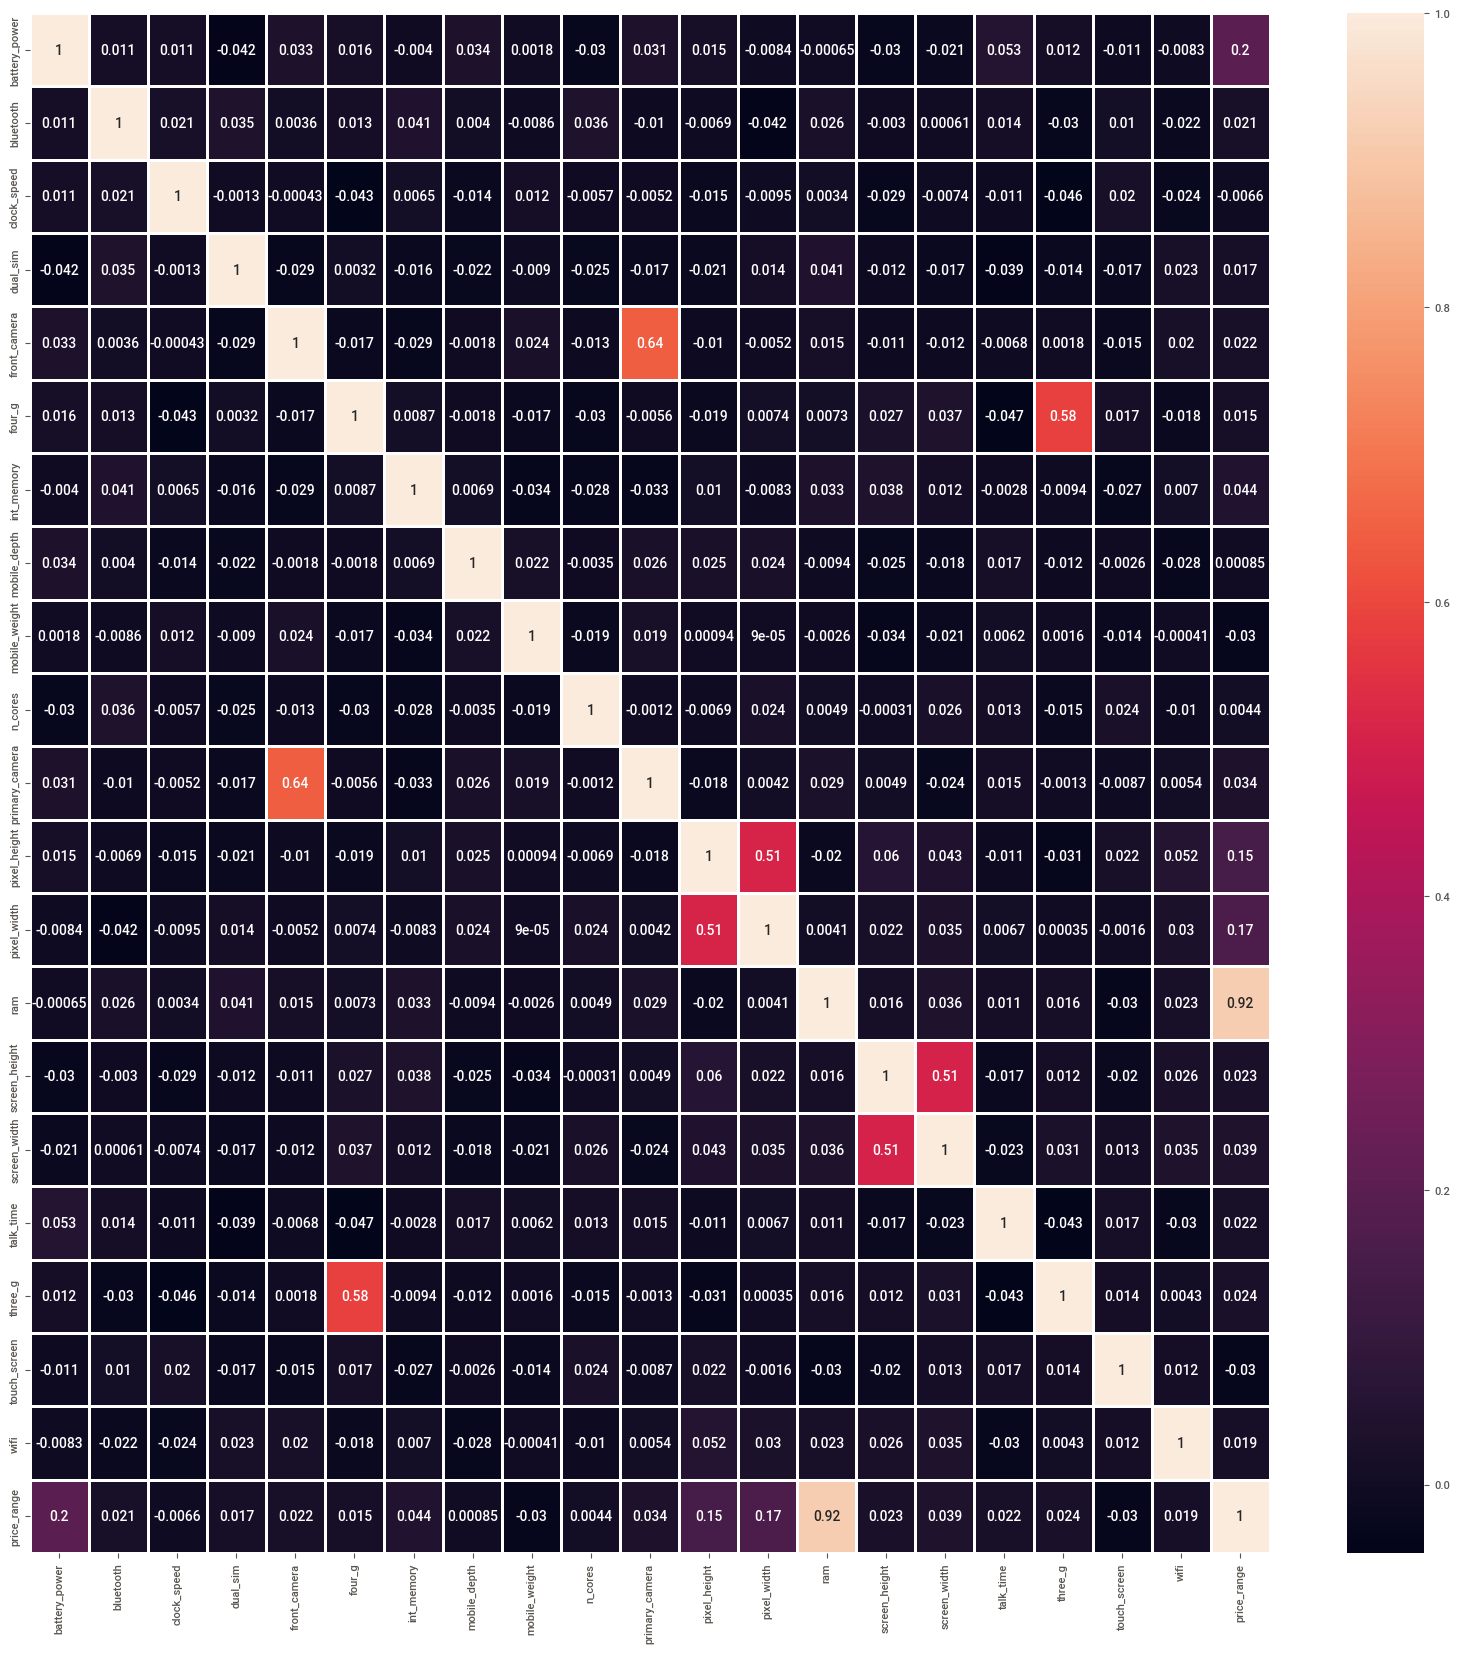

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True , linewidth=1)

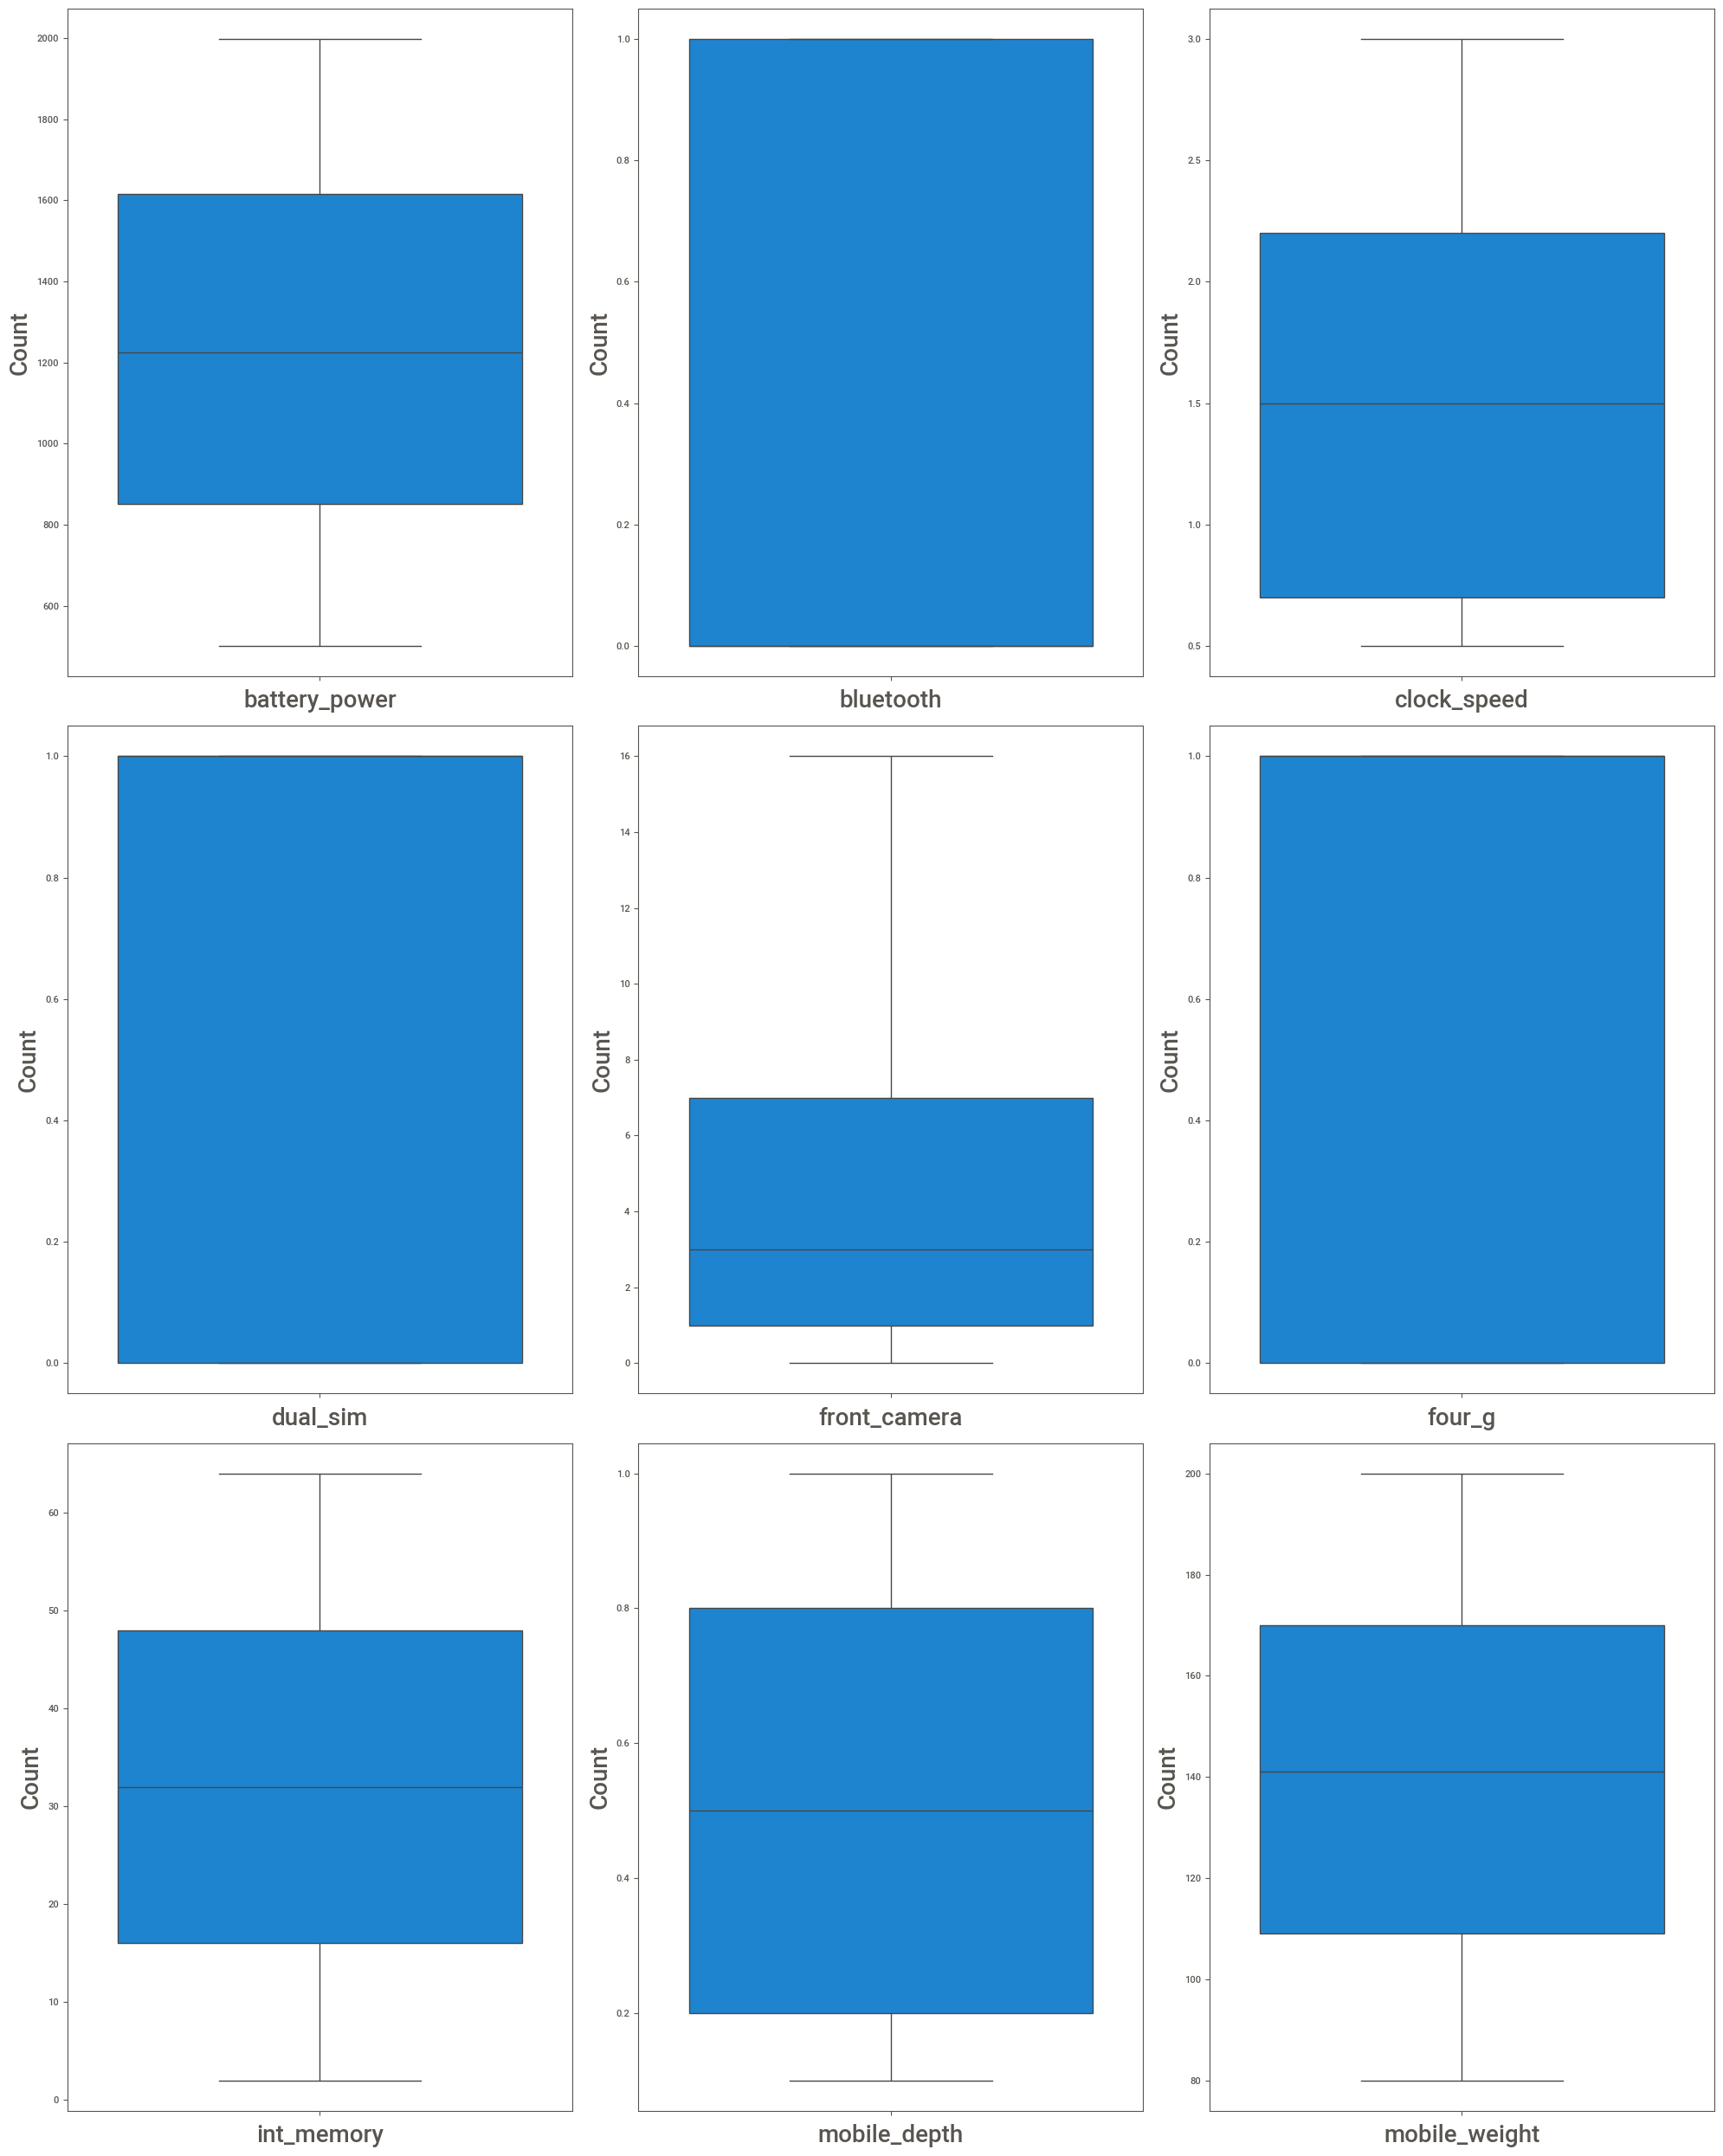

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
# Function to replace outliers with median for a specific column
def replace_outliers_with_median(data, front_camera ):
    median = data[front_camera].median()
    std_dev = data[front_camera].std()
    threshold = 3 * std_dev
    data[front_camera] = data[front_camera].apply(lambda x: median if abs(x - median) > threshold else x)
    return data
# Replace outliers with median for a specific column
data = replace_outliers_with_median(data, 'front_camera')
print("DataFrame with outliers replaced by median:")
print(data)

DataFrame with outliers replaced by median:
      battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0               842          0          2.2         0           1.0       0   
1              1021          1          0.5         1           0.0       1   
2               563          1          0.5         1           2.0       1   
3               615          1          2.5         0           0.0       0   
4              1821          1          1.2         0          13.0       1   
...             ...        ...          ...       ...           ...     ...   
1995            794          1          0.5         1           0.0       1   
1996           1965          1          2.6         1           0.0       0   
1997           1911          0          0.9         1           1.0       1   
1998           1512          0          0.9         0           4.0       1   
1999            510          1          2.0         1           5.0       1   

      i

### 7. Splitting the data  into Train and Test Split 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test = scaler.transform(X_test)

In [37]:
X=data.drop('price_range',axis=1)
y=data.price_range

### 8. Model Creation 

#### A. Linear Regression

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Training the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Making predictions on the testing data
predictions = linear_reg.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Mean Squared Error: 0.1049220036480867
R-squared: 0.9213621921421129


#### B. Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Creating a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters like max_depth, min_samples_split, etc.

# Fitting the model on the training data
dt.fit(X_train, y_train)

# Making predictions on the testing data
predictions = dt.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:",r2)

Mean Squared Error: 0.1475
R-squared: 0.8894504845909902


#### Hyperparameter Tuning for Decision Tree

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:",r2)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 0.12312775651927438
R-squared: 0.8894504845909902


#### C. Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score



# Creating a Support Vector Machine (SVM) regression model
svm = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.

# Training the model on the training data
svm.fit(X_train, y_train)

# Making predictions on the testing data
predictions = svm.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:",r2)

Mean Squared Error: 0.10602507746111688
R-squared: 0.9205354512913275


#### Hyperparameter Tuning for SVR 

In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Define the grid of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'rbf'],  # Kernel type
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': ['scale', 'auto']     # Kernel coefficient for 'rbf' kernel
}

# Creating a Support Vector Machine (SVM) regression model
svm = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:",r2)

Best Hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Mean Squared Error: 0.10616657055532595
R-squared: 0.9204294038811679


#### D. Random Forest 

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is your dataset with features and 'Price' is the target variable for a regression problem
# Assuming you have already split your data into 'X_train', 'X_test' features and 'y_train', 'y_test' target variables

# Creating a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Fitting the model on the training data
rf.fit(X_train, y_train)

# Making predictions on the testing data
predictions = rf.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:",r2)

Mean Squared Error: 0.072112
R-squared: 0.9459529040327151


#### E. XG Boost 

In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is your dataset with features and 'Price' is the target variable for a regression problem


# Training the model
params = {
    'objective': 'reg:squarederror',  # Use regression objective function
    'eval_metric': 'rmse'             # Use root mean squared error (RMSE) as evaluation metric
}
num_rounds = 100  # Number of boosting rounds
dtrain = xgb.DMatrix(X_train, label=y_train)
xg_reg = xgb.train(params, dtrain, num_boost_round=num_rounds)

# Making predictions on the testing data
dtest = xgb.DMatrix(X_test)
predictions = xg_reg.predict(dtest)

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


Mean Squared Error: 0.08174151897487497
R-squared: 0.9387356928036013


#### F. Gradient Boosting 

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()
gbm.fit(X_train,y_train)
y_gbm=gbm.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_gbm)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_gbm)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_gbm)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 0.22440499808889527
Mean Squared Error: 0.08071909181788194
Root Mean Squared Error: 0.28411105543058673
R-squared (R2) Score: 0.9395019899340866


#### Hyperparameter Tuning for Gradient Boost Method

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5]  # Maximum depth of the individual estimators
}

# Create a Gradient Boosting Regressor
gbm = GradientBoostingRegressor()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
Mean Squared Error: 0.06911217596736838
R-squared: 0.9482012368674252


### Model Classification Report

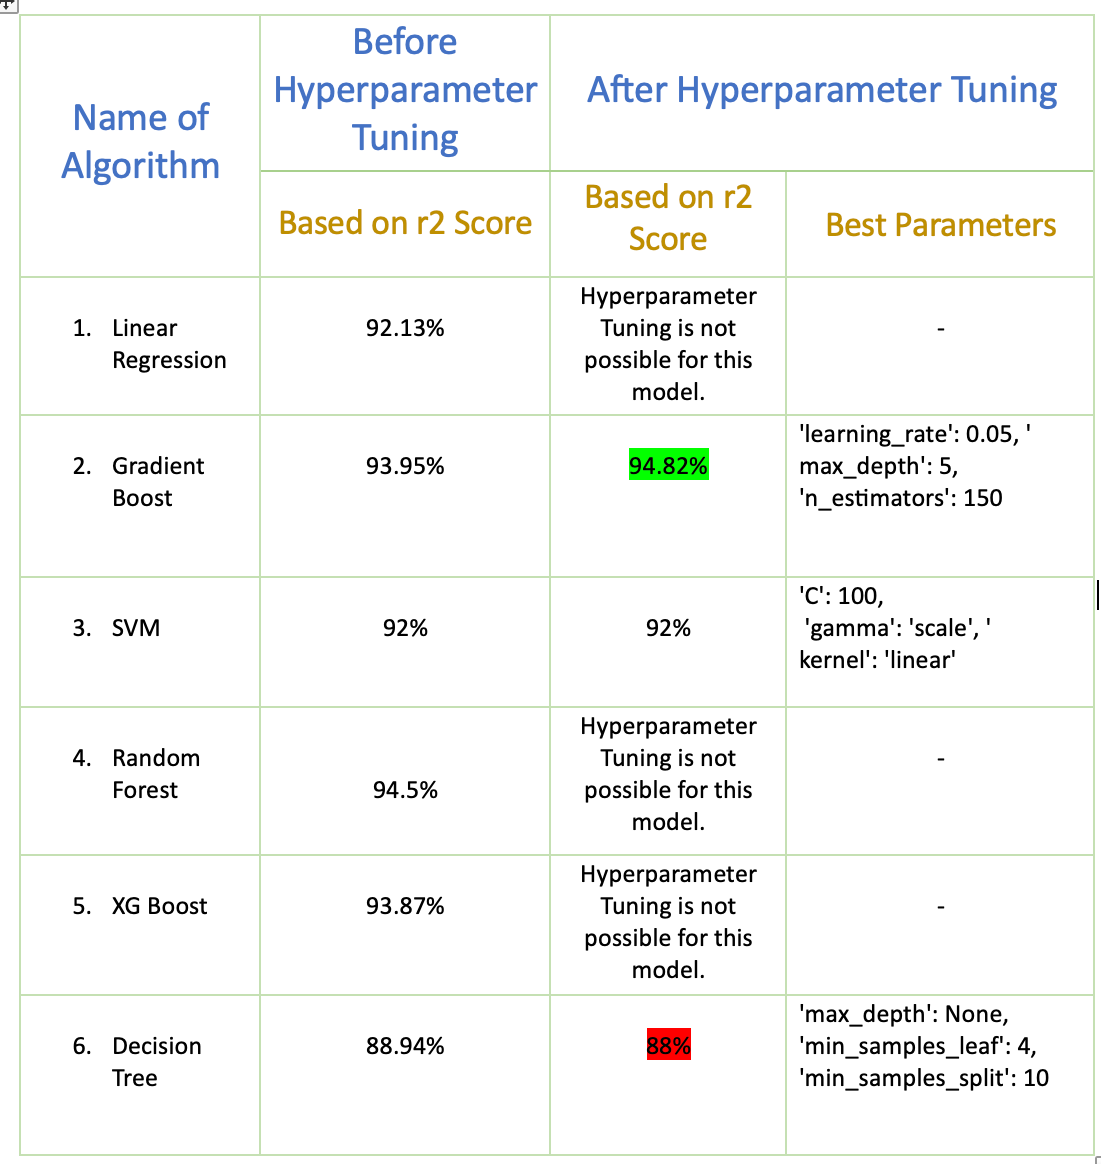

#### As shown in the above table the Gradient Boost Algorithm after Hyperparameter tuning gives the best accuracy of 94.82% whereas Descision Tree after hyperparametertunning gives the lowest accuracy of 88%.

### Challenges Faced 
1. Analyzing the data posed a challenge owing to the extensive array of features.
2. Addressing outliers presented a significant hurdle.
3. Achieving high accuracy with the models proved to be a challenging endeavor.